# chap 14 모델 성능 향상시키기

In [1]:
# 와인의 종류 예측하기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

df = pd.read_csv('data/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [3]:
# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.25,verbose=0)

#  모델 결과 출력
score = model.evaluate(X_test, y_test)
print("Test loss : ", score[0], "Test accuracy : ", score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9792
Test loss :  0.06531982123851776 Test accuracy :  0.9792307615280151


In [5]:
# checkpoint를 통해 모델 업데이트
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# epoch 실행시 마다 모델을 파일로 저장
model_path = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=False, save_best_only=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.25,
         callbacks=[checkpointer], verbose=0)

In [6]:
print(model.history.history['accuracy'].index(max(model.history.history['accuracy'])))
# 제일 높은 정확도의 인덱스
print(max(model.history.history['accuracy']))
# 제일 높은 정확도


91
0.9858865737915039


In [7]:
from tensorflow.keras.models import load_model

# model = load_model('./data/model/all/96-0.968.hdf5')
# model.summary()

# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.25,verbose=0)

In [8]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.401839,0.890685,0.166713,0.940769
1,0.187817,0.934565,0.159374,0.943077
2,0.172437,0.938414,0.139322,0.955385
3,0.163159,0.940467,0.142390,0.947692
4,0.161833,0.941237,0.120985,0.965385


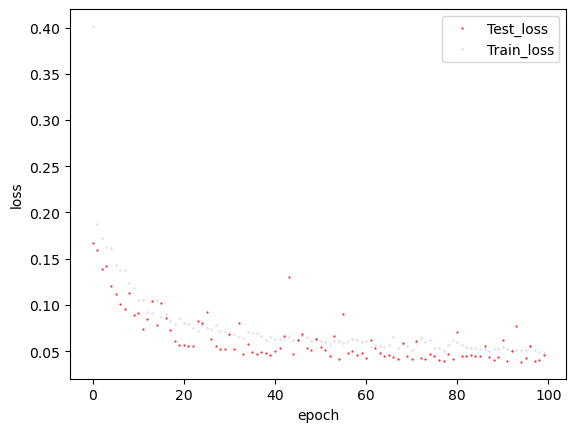

In [14]:
# 그래프로 확인 ( 에러 -> 손실함수의 결과 )
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, "o", markersize= 0.5, c='red', label='Test_loss')
plt.plot(x_len, y_loss, "o", markersize= 0.1,c='darkblue', label='Train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# 중단점과 저장 설정
early_stopping_callback = EarlyStopping(patience=20)
checkpointer = ModelCheckpoint(filepath=model_path, verbose=0, save_best_only=True)

# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
         callbacks=[ early_stopping_callback,checkpointer],verbose=0)